In [144]:
#import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import json
from math import sqrt

In [166]:
#membuat fungsi LinearRegression
def LinearRegression(experience=None, graph=False, error=False):
  #Membuka file train.json sebagai traning data
  with open('train.json', 'r') as file:
    # Membaca File Train.json
    jsondata = file.read()
    # Memparsing JSON menjadi Array
    datas = json.loads(jsondata)
    # Mengubah Data Menjadi Numpy Array
    datas = np.array(datas);
    # Ngerandomize Array
    np.random.shuffle(datas)

    """
    salary = Y atau Variable Dependent
    age = X atau Variable Independent
    """

    # Menghitung Jumlah Data Test dan Training
    totalDataTrain = int((len(datas) * 80) / 100)
    totalDataTest = int(len(datas) - totalDataTrain)

    # Data Train
    agetest = np.array([data['age'] for data in datas[totalDataTrain:]])
    salarytest = np.array([data['salary'] for data in datas[totalDataTrain:]])

    # Data Test
    agetrain = np.array([data['age'] for data in datas[0:totalDataTrain]])
    salarytrain = np.array([data['salary'] for data in datas[0:totalDataTrain]])


    #menghitung jumlah data dan total salary dan age
    sumSalary = sum(salarytrain)
    sumAge = sum(agetrain)

    #mencari Mean dari Salary dan Age
    meanAge = sumAge / totalDataTrain
    meanSalary = sumSalary / totalDataTrain

    #mencari range dari age dan salary berdasarkan mean dan menjumlahkan
    sumrangeAge = agetrain - meanAge
    sumrangeSalary = salarytrain - meanSalary

    #untuk menentukan slope dalam bentuk positif atau negatif
    b1 = (sum(sumrangeAge * sumrangeSalary)) / (sum(sumrangeAge ** 2))

    #menentukan titik mulai dari garis linear
    b0 = meanSalary - (b1 * meanAge)

    # Mencari nilai x(age) yang maksimal
    maxage = 0

    for x in agetrain:
      if x >= maxage:
        maxage = x;

    #menentukan titik ujung dari garis linear
    linearY = b0 + (b1 * maxage)

    if(graph):
      x = agetrain
      y = salarytrain

      x1 = np.array([0, meanAge, maxage]);
      y1 = np.array([b0, meanSalary, linearY])

      # Menentukan Garis Linear
      plt.plot(x1, y1);

      # Mempersebar data
      plt.scatter(x, y);
      plt.scatter(meanAge, meanSalary);
      plt.show()

    predictedsalary = np.array(([int(b0 + b1 * x) for x in agetest]));

    if(error == True):
      print('\nError')
      SEE = sqrt((sum((predictedsalary - salarytest) ** 2) / (totalDataTest - 2)))
      print("SEE:", SEE)

      MAE = (sum(salarytest - predictedsalary)) / totalDataTest
      print("MAE:", MAE)

      MSE = sum(((salarytest - predictedsalary) ** 2)) / totalDataTest
      print("MSE:", MSE)

      RMSE = sqrt(((sum(salarytest - predictedsalary)) ** 2) / totalDataTest)
      print("RMSE:", RMSE)

      MAPE = (sum((predictedsalary - salarytest) / salarytest) * 100) / totalDataTest
      print("MAPE:", MAPE)

    if(experience != None):
      prediction = b0 + b1 * experience
      print(prediction)

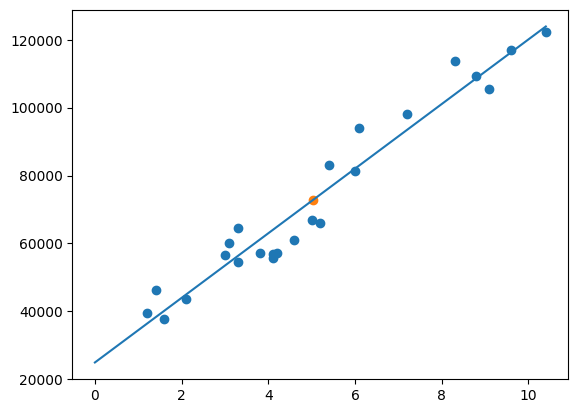


Error
SEE: 4637.450457956397
MAE: -2309.8333333333335
MSE: 14337297.833333334
RMSE: 5657.913057538678
MAPE: 3.7984781587815584


In [168]:
LinearRegression(graph=True, error=True)
# Titik Warna Orange adalah Mean Dari X dan Y

In [159]:
LinearRegression(4.1)

62537.9048213132
